用いたデータはこのようになっており, 第7回の課題と同じデータである

In [533]:
data = read.csv("../regression/data.csv")
X = data$xn
T = data$tn
t(X)
t(T)
x = seq(0, 1, length=100)

0.5042519,0.6829646,0.225022,0.1155181,0.04485298,0.06125487,0.02000714,0.005314946,0.8037826,0.3788576


-0.06965277,-0.9426735,0.8262086,0.4359847,0.5106443,0.2276137,0.2962799,0.05393036,-0.8261503,0.6780956


In [534]:
sigmoid = function(x) {
    return(1/(1 + exp(-x)))
}

s = 0.125
m = function(j) {
    return(0.125 * (j-1))
}
calc_mu = function(x, j) {
    return(sigmoid((x - m(j))/s))
}
calc_mus = function(X) {
    mus = c()
    for (i in 1:length(X)) {
        for (j in 1:9) {
            mus = append(mus, calc_mu(X[i],  j))  
        }
    }
    return(mus)
}

ノイズの精度パラメータ$\beta$を既知として, モデルパラメータ$\mathbf{w}$の事前分布と事後分布は以下のようになる.
$$
p ( \mathbf { w } ) = N \left( \mathbf { w } | \mathbf { m } _ { 0 } , \mathbf { S } _ { 0 } \right) \\
\left. \begin{array} { c } { p ( \mathbf { w } | \mathbf { t } ) = N \left( \mathbf { w } | \mathbf { m } _ { N } , \mathbf { S } _ { N } \right) } \\ { \mathbf { m } _ { N } = \mathbf { S } _ { N } \left( \mathbf { S } _ { 0 } ^ { - 1 } \mathbf { m } _ { 0 } + \beta \mathbf { \Phi } ^ { T } \mathbf { t } \right) } \\ { \mathbf { S } _ { N } ^ { - 1 } = \mathbf { S } _ { 0 } ^ { - 1 } + \beta \mathbf { \Phi } ^ { T } \mathbf { \Phi } } \end{array} \right.
$$  

なお, 問題文に$s$と$m_j$の定義が書いてなかったので, 第7回目の課題と同じように以下の定義で問題を解いた.
$$
s = 0.125 \\
m_j =0.125(j-1)
$$
  
多くの場合, $\mathbf{m}_0 = 0, \mathbf{S}_0 = \alpha^{-1}\mathbf { I }$であり, この場合は$\mathbf{m}_N, \mathbf{S}_N^{-1}$は次のようになる
$$
\left. \begin{array} { c } { \mathbf { m } _ { N } = \mathbf { S } _ { N } \beta \mathbf{\Phi} ^ { T } t } \\ { \mathbf{S} _ { N } ^ { - 1 } = \alpha \mathbf { I } + \beta \mathbf{\Phi} ^ { T } \mathbf{\Phi} } \end{array} \right.
$$

ただし, $\mathbf{\Phi}$は以下のような計画行列である.

In [535]:
mus = calc_mus(X)
Mu = t(matrix(data = mus, nrow =9,  ncol = 10))
Mu

0.9826048,0.9540874,0.8843225,0.73769365,0.50850306,0.275681607,0.122820849,0.0489864555,0.0185969715
0.9957801,0.9886117,0.9696376,0.92155876,0.81210049,0.613895529,0.369052624,0.1770762355,0.0733534129
0.8581703,0.6900121,0.4502095,0.23150649,0.09976628,0.039172339,0.014776591,0.0054872582,0.0020256758
0.7158858,0.4810452,0.2542911,0.11146579,0.04411426,0.016694256,0.006206975,0.0022924127,0.0008445553
0.5887557,0.3449807,0.1623051,0.06653495,0.02555149,0.009554182,0.003536143,0.0013037888,0.0004800327
0.6201156,0.3752027,0.1809446,0.07516282,0.02903013,0.010879229,0.004029959,0.0014863253,0.0005473027
0.5399291,0.3015468,0.1370580,0.05520352,0.02104252,0.007845467,0.002900571,0.0010690205,0.0003935366
0.5106283,0.2773829,0.1237400,0.04938415,0.01875282,0.006981535,0.002579748,0.0009505864,0.0003499115
0.9983906,0.9956372,0.9882288,0.96863700,0.91910594,0.806941983,0.605935997,0.3612970570,0.1722536060
0.9539490,0.8839993,0.7370827,0.50771451,0.27505205,0.122481343,0.048839681,0.0185394759,0.0069011681


(1) 上式より, $\mathbf{w}$の事後分布の平均と共分散行列を求める.   
まず, 共分散行列は以下のようになる.

In [536]:
alpha = 2
beta = 25
m_0  = diag(0, 9)

S_n = solve(alpha * diag(9) + beta * t(Mu) %*% Mu)
S_n

0.120170824,-0.159448105,-0.012356897,0.0349695472,0.024404603,0.003674474,-0.005905732,-0.0058034249,-0.003180869
-0.159448105,0.330498684,-0.129894942,-0.0627051307,-0.008084703,0.015513669,0.015883231,0.0091867508,0.004124272
-0.012356897,-0.129894942,0.321464677,-0.1411230997,-0.063917050,-0.003887143,0.017919848,0.0155854169,0.008249347
0.034969547,-0.062705131,-0.141123100,0.3391266182,-0.121043241,-0.059683801,-0.015801664,0.0007365608,0.002619234
0.024404603,-0.008084703,-0.063917050,-0.1210432412,0.354321260,-0.123864642,-0.076678626,-0.0367022806,-0.015080696
0.003674474,0.015513669,-0.003887143,-0.0596838013,-0.123864642,0.348454705,-0.126227317,-0.0762737989,-0.036180611
-0.005905732,0.015883231,0.017919848,-0.0158016642,-0.076678626,-0.126227317,0.372244365,-0.0873233760,-0.044091276
-0.005803425,0.009186751,0.015585417,0.0007365608,-0.036702281,-0.076273799,-0.087323376,0.4361718174,-0.033233182
-0.003180869,0.004124272,0.008249347,0.0026192343,-0.015080696,-0.036180611,-0.044091276,-0.0332331819,0.482464894


平均は以下のようになる

In [537]:
m_n = S_n %*% (beta * t(Mu) %*% T)
t(m_n)

0.3020984,0.6304731,0.2572285,-0.5084294,-0.9468859,-0.7536024,-0.291484,-0.02347439,0.02900806


以下の式より, 新しい分布の予測を行う.
$$
p ( t | \mathbf { x } , \mathbf { t } , \alpha , \beta ) = N \left( t | \mathbf { m } _ { N } ^ { \mathrm { T } } \mathbf { \mathbf{\phi} } ( \mathbf { x } ) , \sigma _ { t } ^ { 2 } ( \mathbf { x } ) \right) \\
\sigma _ { t } ^ { 2 } ( \mathbf{x} ) = \frac { 1 } { \beta } + \mathbf{\phi} ( \mathbf{x} ) ^ { T } \mathbf{S} _ { N } \mathbf{\phi} ( x )
$$

tの予測値の標準偏差$\sigma^2_t(\mathbf{x})$は以下のようになり, $0.24$

In [538]:
x = 0.5
mu = calc_mus(x)
sigma.2.t = 1/beta + t(mu) %*% S_n %*% mu
sqrt(sigma.2.t)

0.2351852


tの予測値の平均は以下のようになり, $0.04$となる

In [539]:
m.t = t(m_n) %*% mu
m.t

0.04065631


## 考察

In [540]:
x = seq(0, 1, length=100)
sigma.x = c()
for (i in 1:100) {
    mu.x = calc_mus(x[i])
    mu.x = t(matrix(data = mu.x, nrow =9,  ncol = length(x[i])))
    sigma.x =  append(sigma.x,1/beta +(mu.x)%*% S_n %*% t(mu.x))
}
mu = calc_mus(x)
mu = t(matrix(data = mu, nrow =9,  ncol = length(x)))
sigma.2.t = 1/beta +(mu)%*% S_n %*% t(mu)
t  = t(m_n) %*% t(mu)

結果をグラフに描画したところ、このような結果になった.  
これより, ベイズ回帰した結果は, 赤線部分を平均として確率的にxに対する値が得られる.
 - 黒線：$\sin(2\pi x)$のグラフ.
 - 赤線：ベイズ回帰したモデルの平均値を用いたもの.
 - 緑線：ベイズ回帰したモデルから標準偏差分+-の線.
 - 黒丸：元データ.

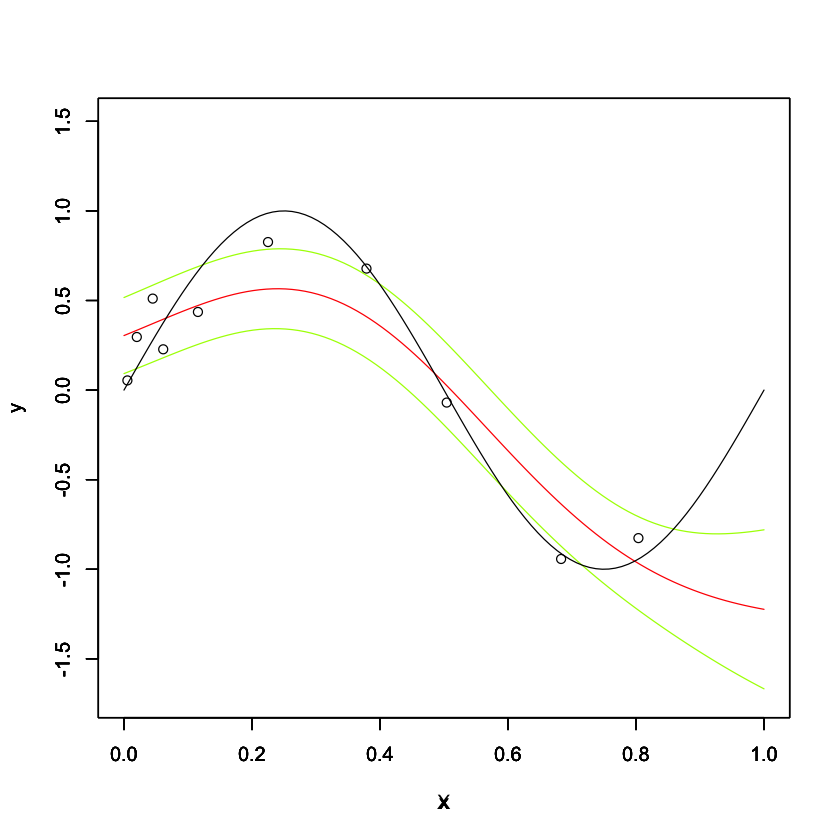

In [541]:
xlim=c(0, 1)
ylim = c(-1.7, 1.5)
ylab="y"
plot(x, t, type="l", ylim=ylim, col="red", ylab=ylab)
par(new = TRUE)
plot(xlim=xlim, X, T, ylim=ylim, ylab=ylab)
par(new=TRUE)
plot(xlim=xlim, x, t+sqrt(sigma.x),type="l", col="#aaff00",ylim=ylim, ylab=ylab)
par(new=TRUE)
plot(xlim=xlim, x, t-sqrt(sigma.x),type="l", col="#aaff00",ylim=ylim, ylab=ylab)

par(new=TRUE)
plot(x, sin( 2 * pi * x), type="l", ylim=ylim, ylab=ylab)